In [278]:
import pandas as pd

## Getting data

In [279]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


At first it looks like there are many missing values

In [280]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [281]:
erased_columns = []

# EDA

## Univariate analysis

Columns with over 17% missing values, will get difficult to fill, that's why we are going to erase it

In [282]:
import pandas as pd

def summarize_nulls(df):
    null_counts = df.isnull().sum()
    null_percentage = (null_counts / len(df)) * 100

    null_summary = pd.DataFrame({
        'Null Count': null_counts,
        'Null Percentage': null_percentage
    }).sort_values(by='Null Count', ascending=False)

    # Filter out columns that have no nulls
    null_summary = null_summary[null_summary['Null Count'] > 0]

    return null_summary

summary = summarize_nulls(df_train)
summary

,Null Count,Null Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageQual,81,5.547945
GarageFinish,81,5.547945
GarageType,81,5.547945


As we can see there are columns that has over 50% of null values, but some columns has NA as category defined in the data_description.txt

### PoolQC case

In [283]:
df_train['PoolQC'].value_counts()
# We will use NoPool as category for missing values

df_train['PoolQC'] = df_train['PoolQC'].fillna('NoPoolQC')

### MiscFeature case

In [284]:
df_train['MiscFeature'].value_counts()
# We will use NoMiscFeature as category for missing values

df_train['MiscFeature'] = df_train['MiscFeature'].fillna('NoMiscFeature')

### Alley case

In [285]:
df_train['Alley'].value_counts()
# We will use NoAlley as category for missing values

df_train['Alley'] = df_train['Alley'].fillna('NoAlley')

### Fence case

In [286]:
df_train['Fence'].value_counts()
# We will use NoFence as category for missing values

df_train['Fence'] = df_train['Fence'].fillna('NoFence')

### MasVnrType case

In [287]:
df_train['MasVnrType'].value_counts()
# We will use NoMasVnrType as category

df_train['MasVnrType'] = df_train['MasVnrType'].fillna('NoMasVnrType')

### FireplaceQu case

In [288]:
df_train['FireplaceQu'].value_counts()
# We will use NoFireplaceQu as a category

df_train['FireplaceQu'] = df_train['FireplaceQu'].fillna('NoFireplaceQu')

### LotFrontage case

In [289]:
df_train['LotFrontage'].value_counts()
# We will put 0 value to LotFrontage that has NA

df_train['LotFrontage'] = df_train['LotFrontage'].fillna(0)

### GarageQual case

In [290]:
df_train['GarageQual'].value_counts
# We will change NA to NoGarageQueal

df_train['GarageQual'] = df_train['GarageQual'].fillna('NoGarageQual')

### GarageType case

In [291]:
df_train['GarageType'].value_counts()
# We will put NoGarageType as category for NA values

df_train['GarageType'] = df_train['GarageType'].fillna('NoGarageType')

### GarageFinish case

In [292]:
df_train['GarageFinish'].value_counts()
# We will put NoGarageFinish as a category for NA values

df_train['GarageFinish'] = df_train['GarageFinish'].fillna('NoGarageFinish')

### GarageCond case

In [293]:
df_train['GarageCond'].value_counts()
# We will put NoGarageCond as a category for NA values

df_train['GarageCond'] = df_train['GarageCond'].fillna('NoGarageCond')

### BsmtFinType2 case

In [294]:
df_train['BsmtFinType2'].value_counts()
# We will put NoBsmtFinType2 as a category for NA values

df_train['BsmtFinType2'] = df_train['BsmtFinType2'].fillna('NoBsmtFinType2')

### BsmtExposure case

In [295]:
df_train['BsmtExposure'].value_counts()
# We will put NoBsmtExposure as a category for NA values

df_train['BsmtExposure'] = df_train['BsmtExposure'].fillna('NoBsmtExposure')

### BsmtCond case

In [296]:
df_train['BsmtCond'].value_counts()
# we will use NoBsmtCond for NA values

df_train['BsmtCond'] = df_train['BsmtCond'].fillna('NoBsmtCond')

### BsmtQual case

In [297]:
df_train['BsmtQual'].value_counts()
# we will use NoBsmtQual for NA values - Consider the amount of NA for the other Bsmt cols

df_train['BsmtQual'] = df_train['BsmtQual'].fillna('NoBsmtQual')

### BsmtFinType1 case

In [298]:
df_train['BsmtFinType1'].value_counts()
# we will use NoBsmtFinType1 for NA values 

df_train['BsmtFinType1'] = df_train['BsmtFinType1'].fillna('NoBsmtFinType1')

### MasVnrArea case - numerical

We will see how to treat this missing values

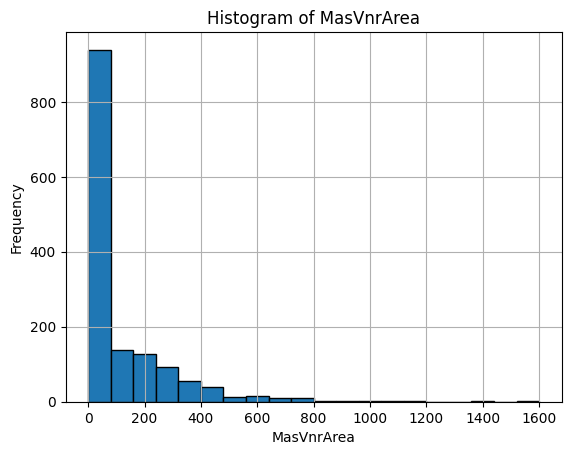

In [299]:
import matplotlib.pyplot as plt

plt.hist(df_train['MasVnrArea'].dropna(), bins=20, edgecolor='black')
plt.title('Histogram of MasVnrArea')
plt.xlabel('MasVnrArea')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# we will impute this with the most frequent value


In [300]:
# replace this with the most frequent value MasVnrArea
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].mode()[0])

### Electrical case - categorical

We will see how to treat this missing values

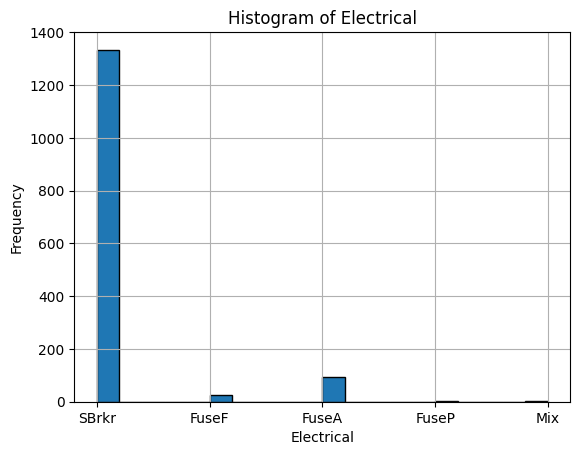

In [301]:
plt.hist(df_train['Electrical'].dropna(), bins=20, edgecolor='black')
plt.title('Histogram of Electrical')
plt.xlabel('Electrical')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# we will replace this with the most common value

In [302]:
# replace the NaN values in 'Electrical' with the most frequent value
df_train['Electrical'] = df_train['Electrical'].fillna(df_train['Electrical'].mode()[0])

### GarageYrBlt - case

In [303]:
# GarageYrBlt change if it has a value to 1 otherwise 0
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].notna().astype(int)



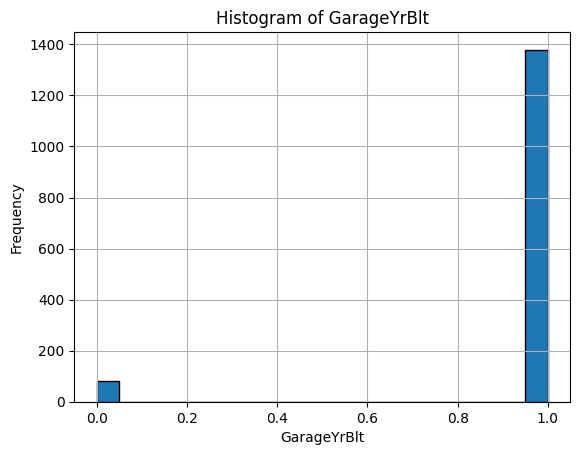

In [304]:
plt.hist(df_train['GarageYrBlt'], bins=20, edgecolor='black')
plt.title('Histogram of GarageYrBlt')
plt.xlabel('GarageYrBlt')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

---
---
---
---
---

In [305]:
# do a function for plot a histogram
def plot_histogram(df, column):
    plt.hist(df[column].dropna(), bins=20, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()





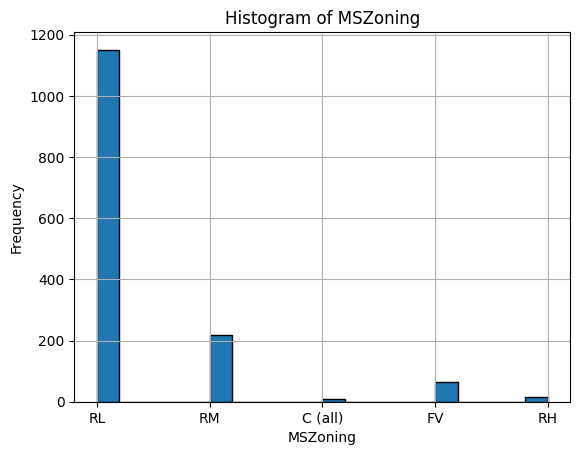

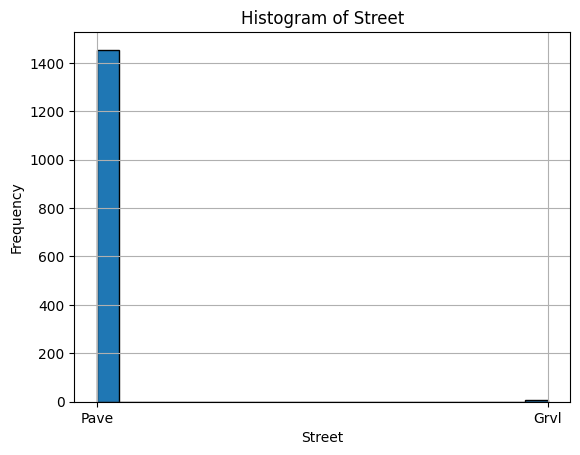

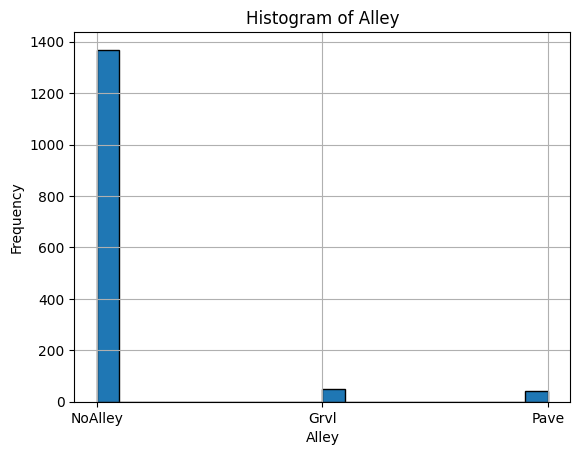

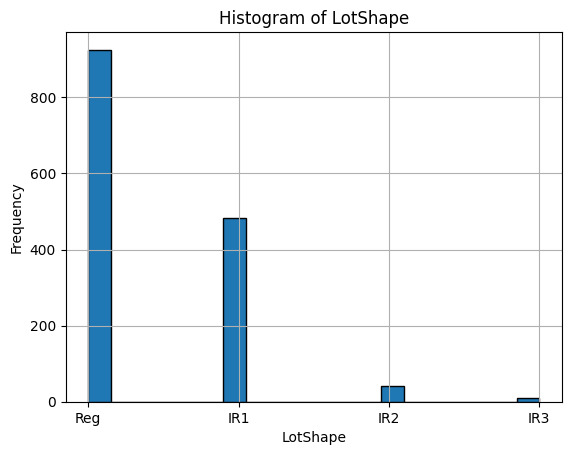

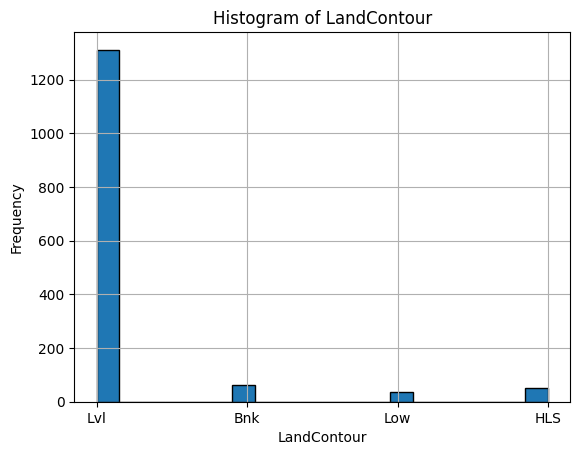

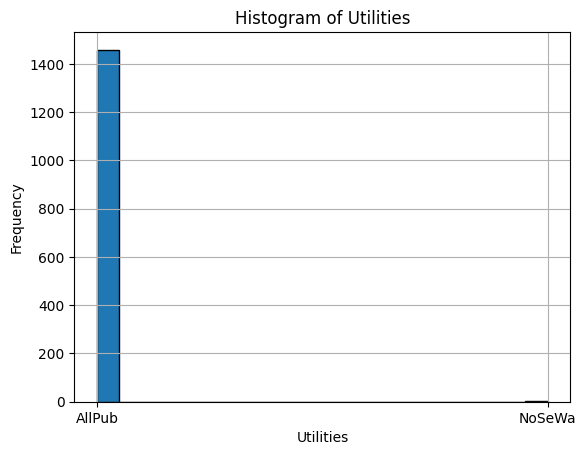

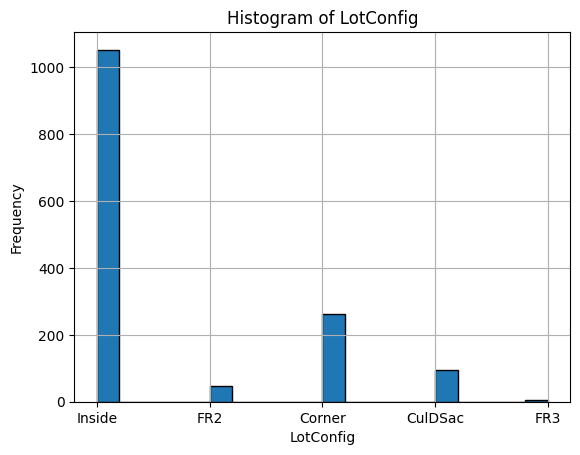

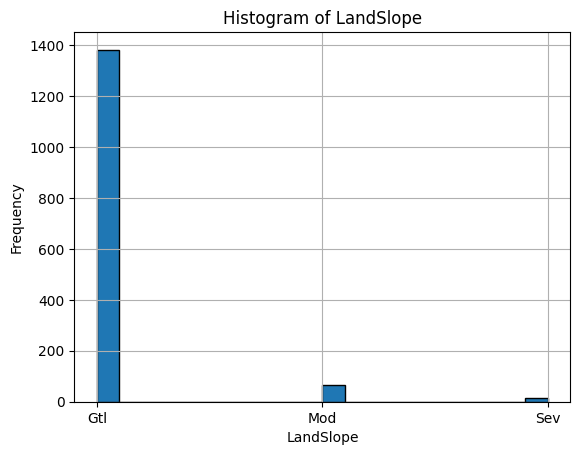

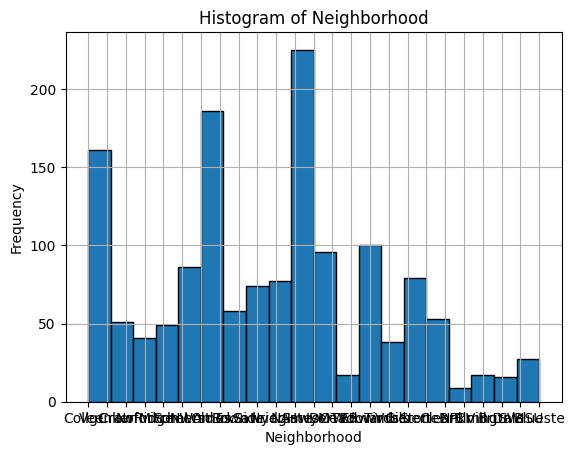

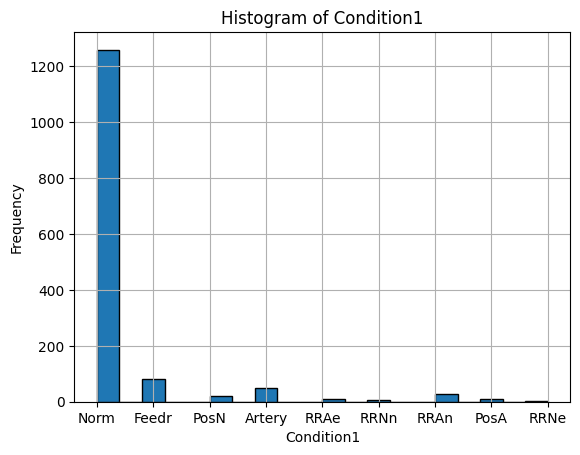

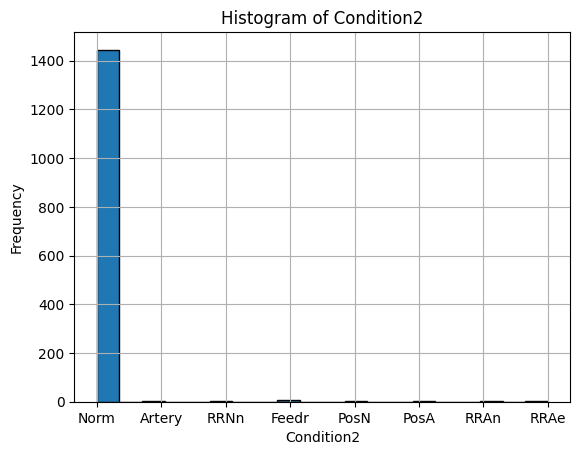

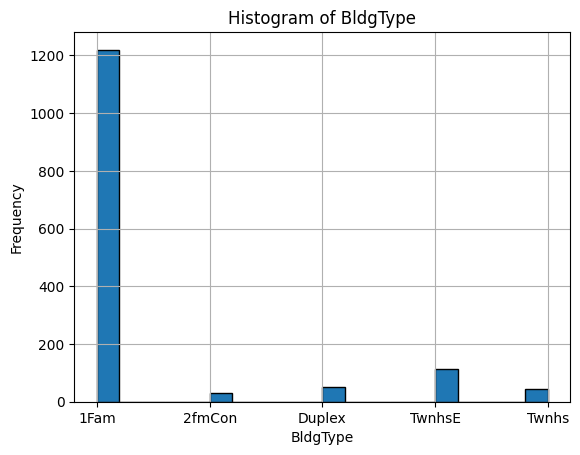

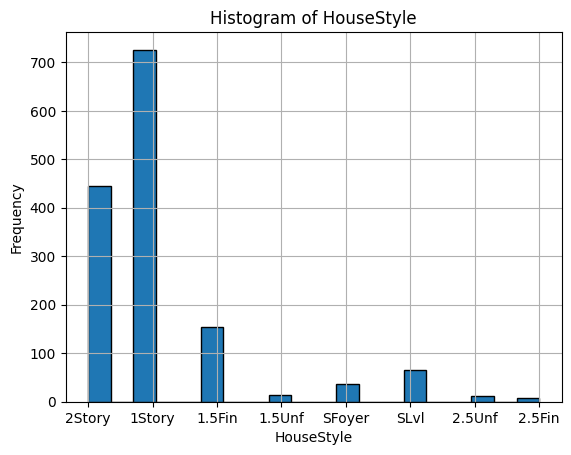

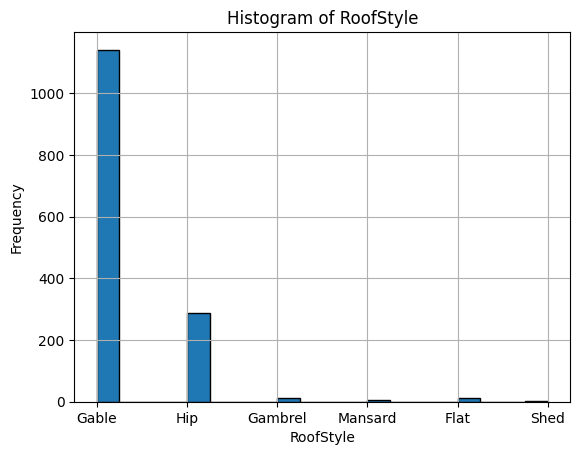

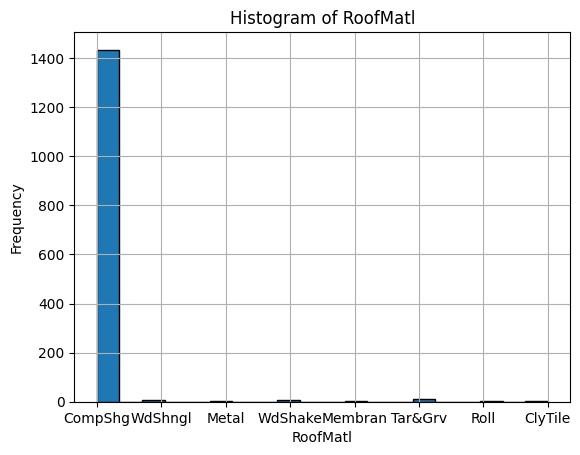

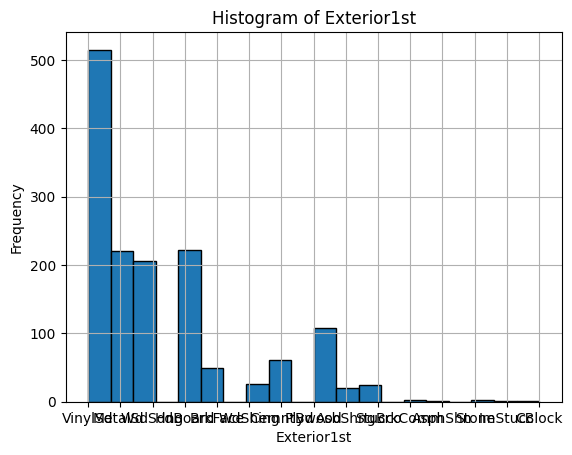

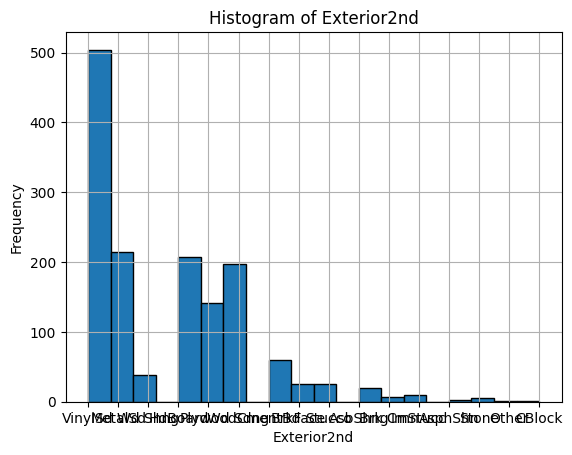

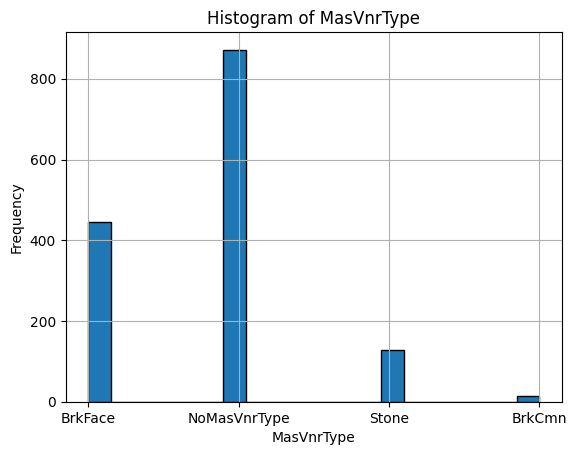

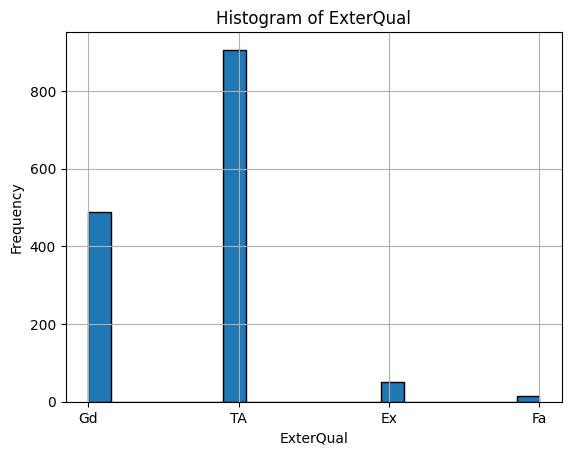

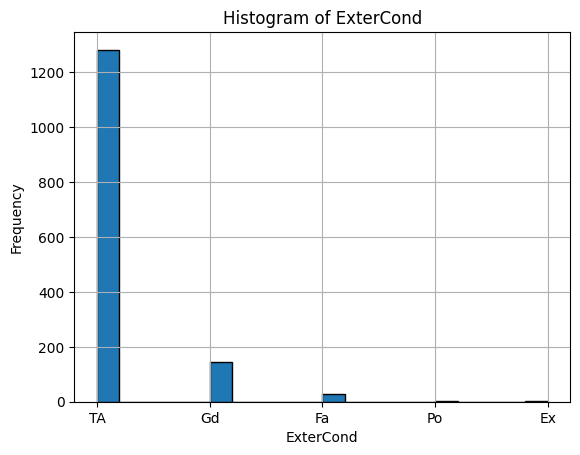

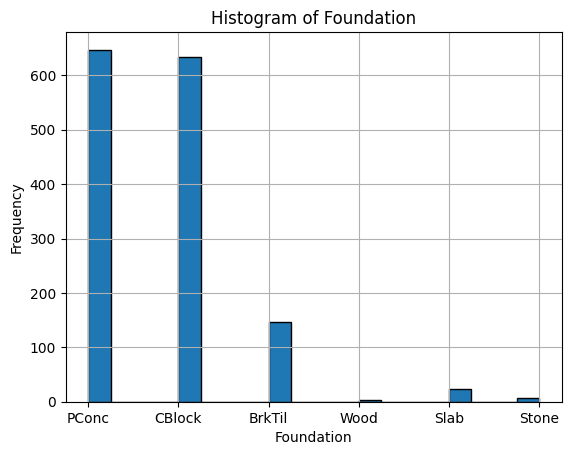

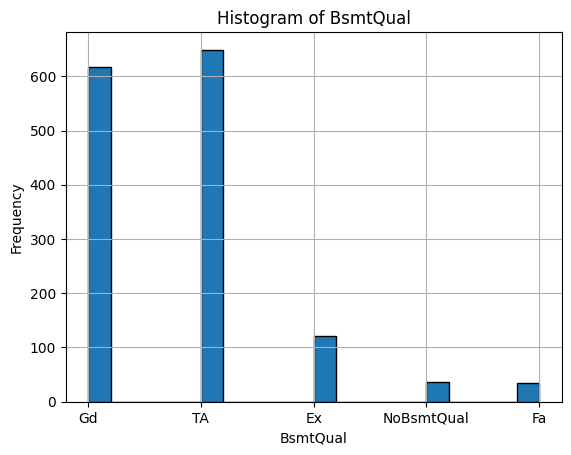

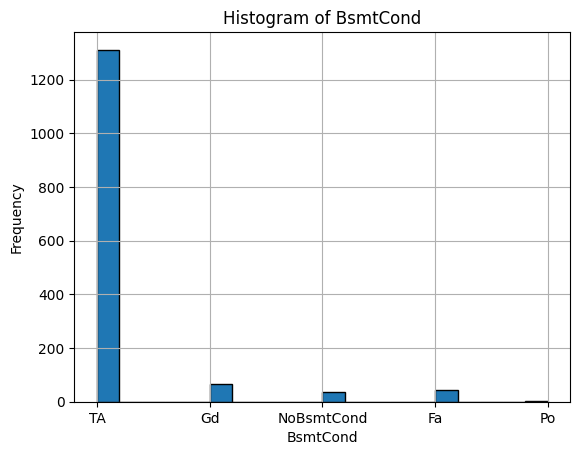

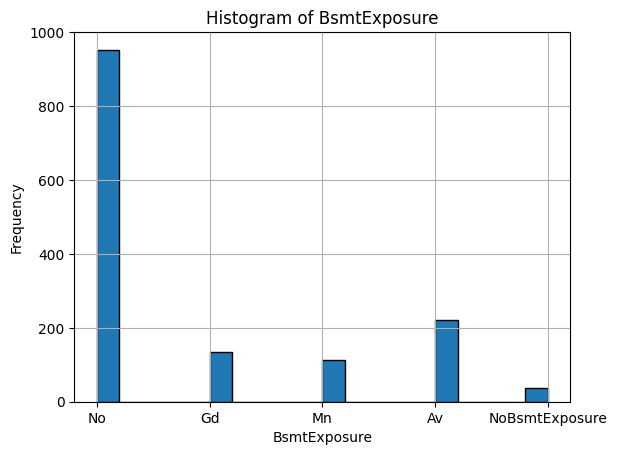

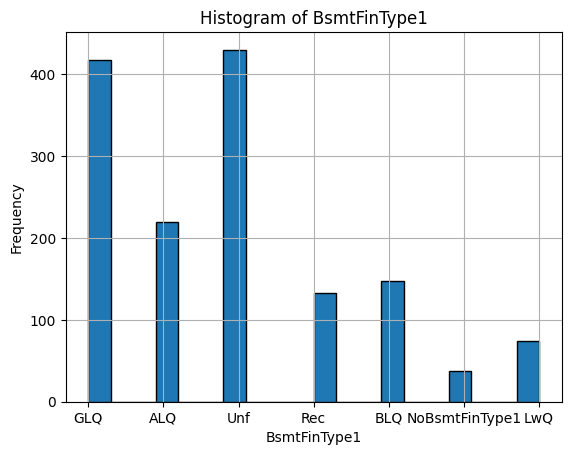

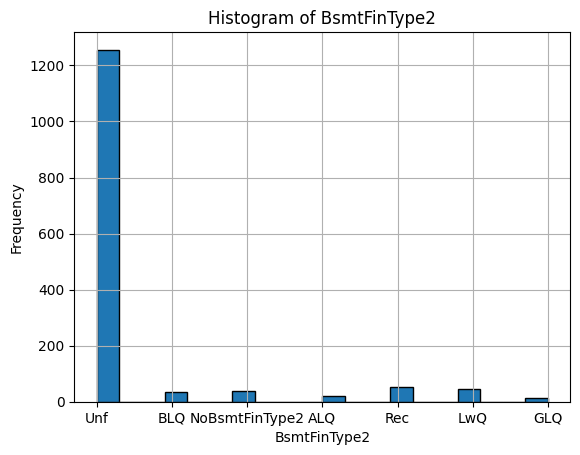

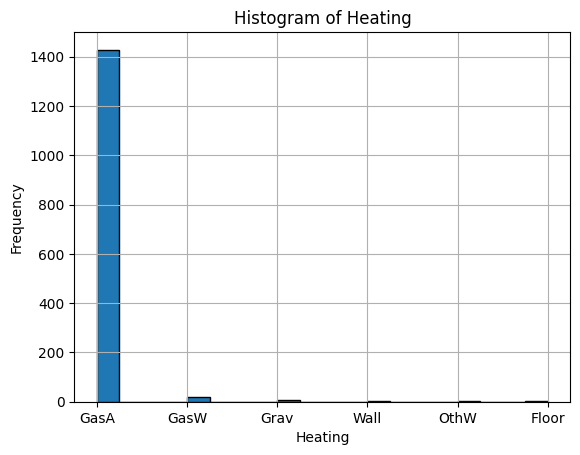

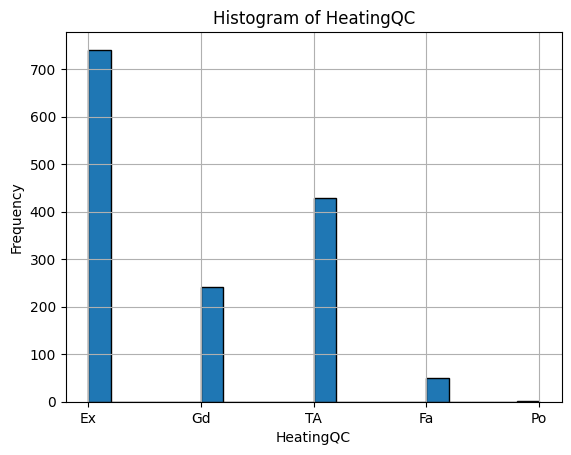

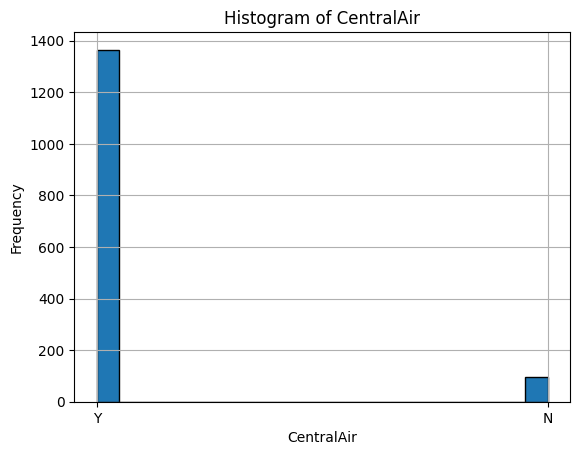

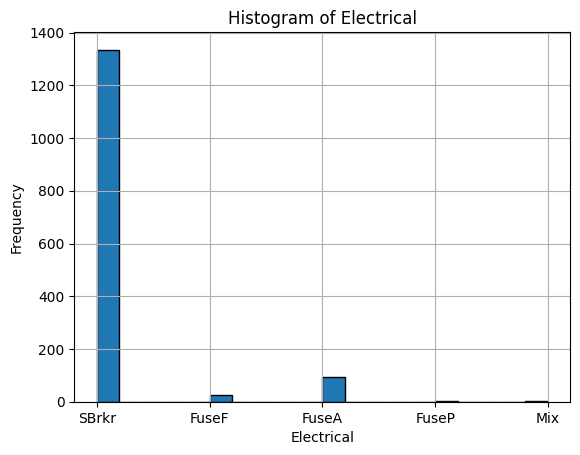

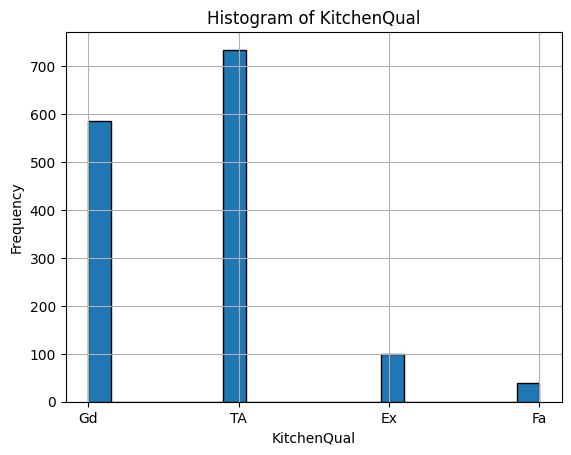

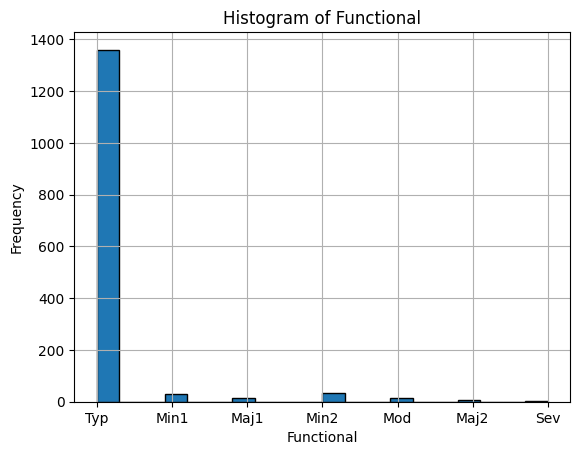

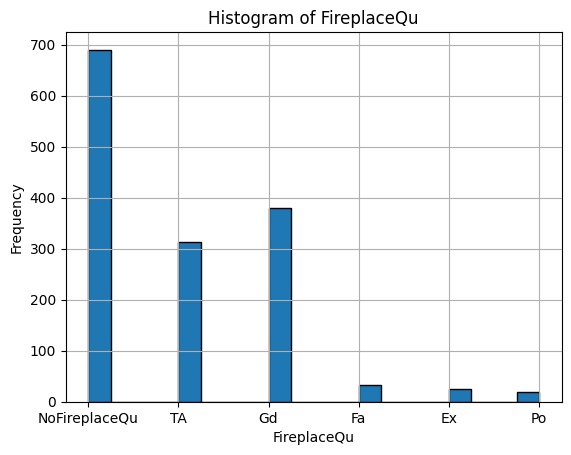

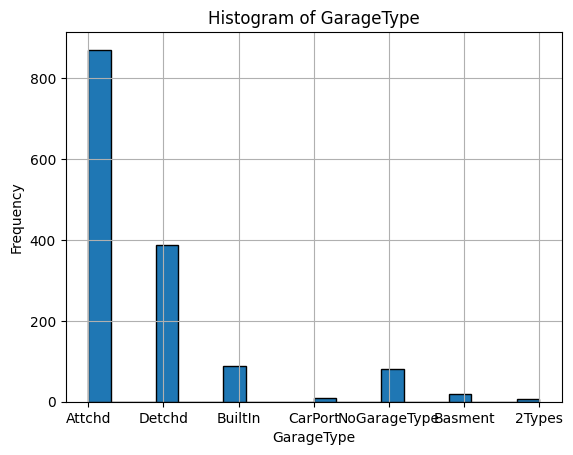

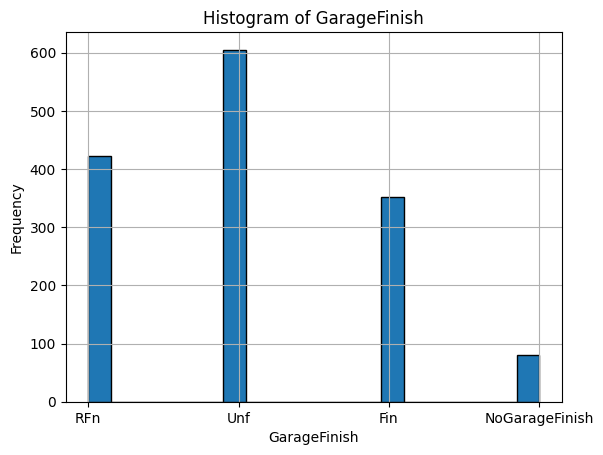

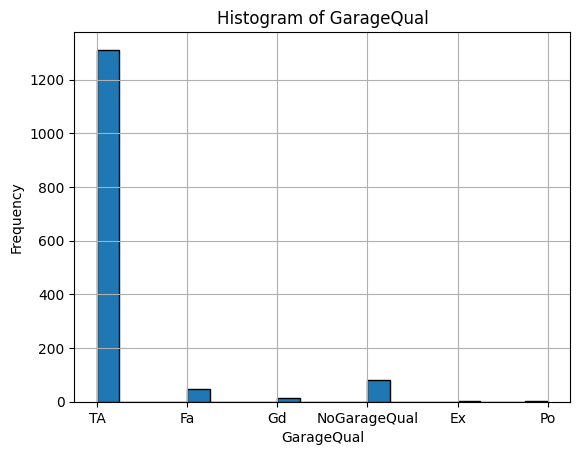

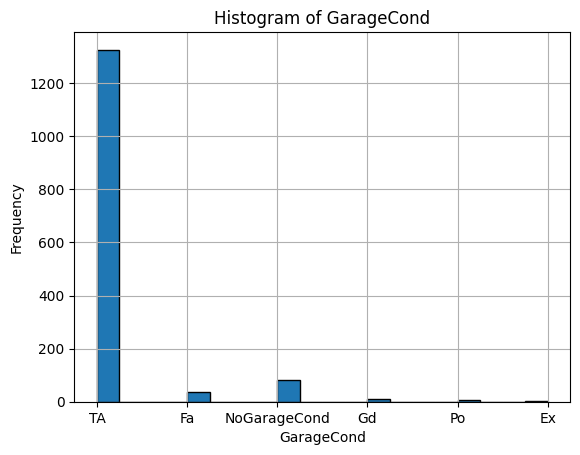

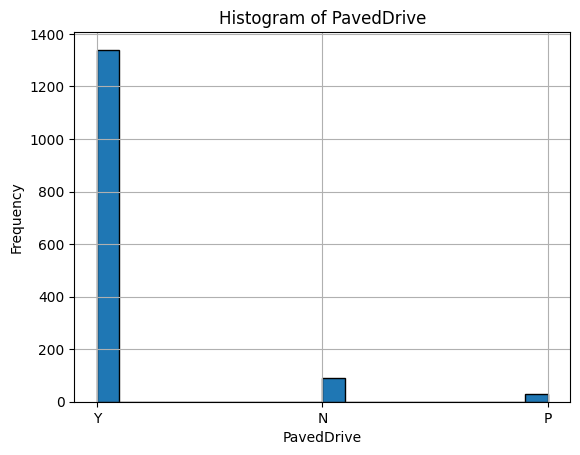

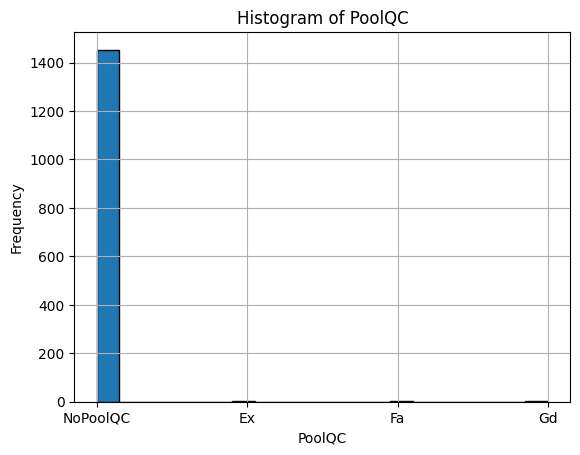

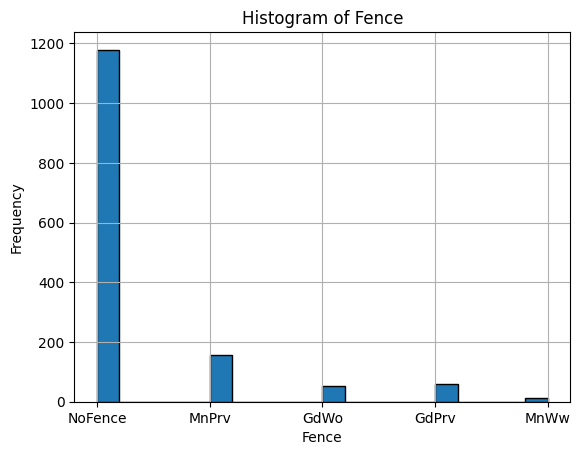

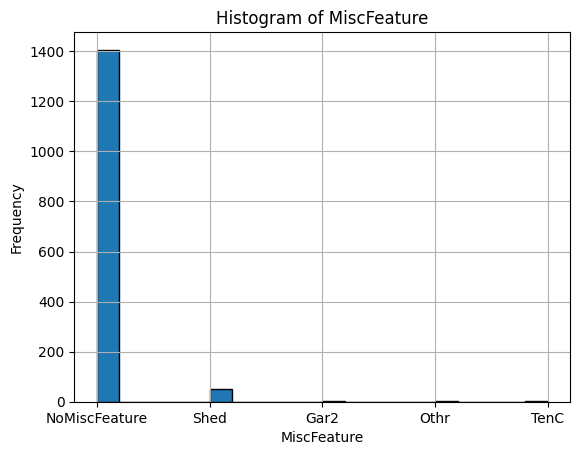

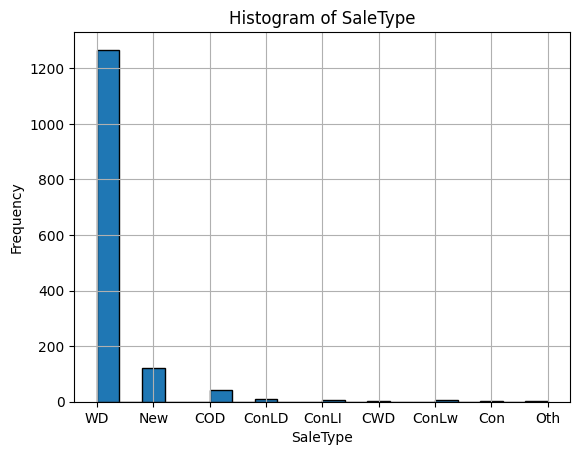

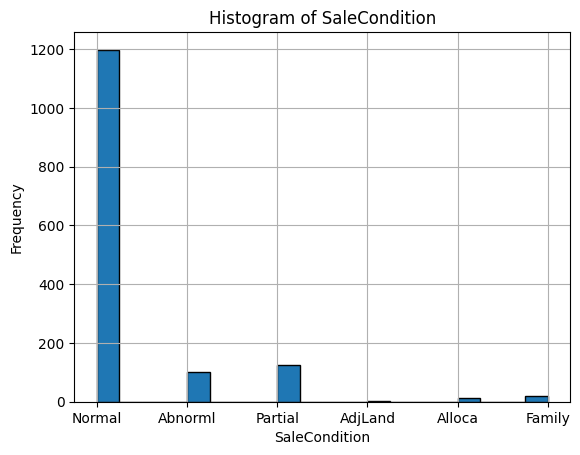

In [306]:
categorical_columns = df_train.select_dtypes(include=['object']).columns
# Plot histograms for categorical columns
for column in categorical_columns:
    plot_histogram(df_train, column)

We also erase this columns since they have a huge proporcion of just one category than the other ones

In [307]:
categorical_columns_to_drop =[
    'Street',
    'Utilities',
    'RoofMatl',
    'Heating',
    'Condition2',
    'Functional',
    'PoolQC'
]

df_train = df_train.drop(columns=categorical_columns_to_drop)
erased_columns = erased_columns + categorical_columns_to_drop

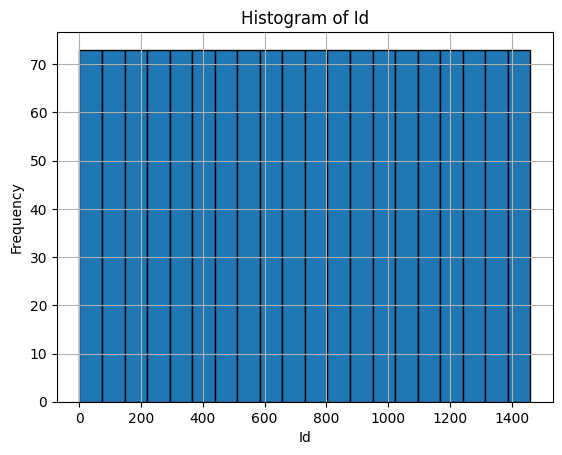

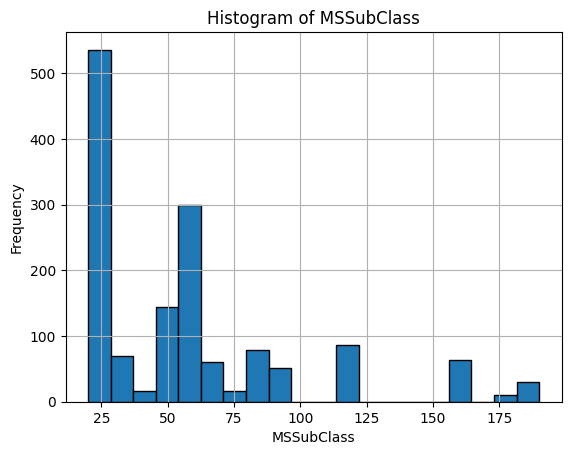

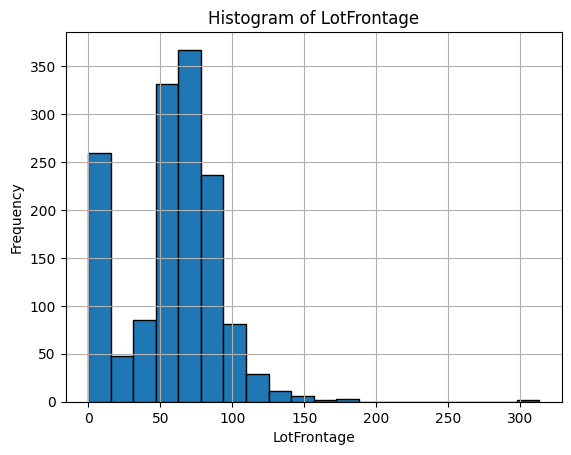

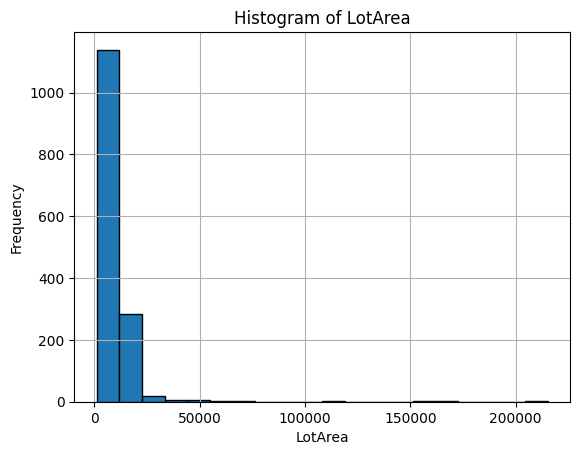

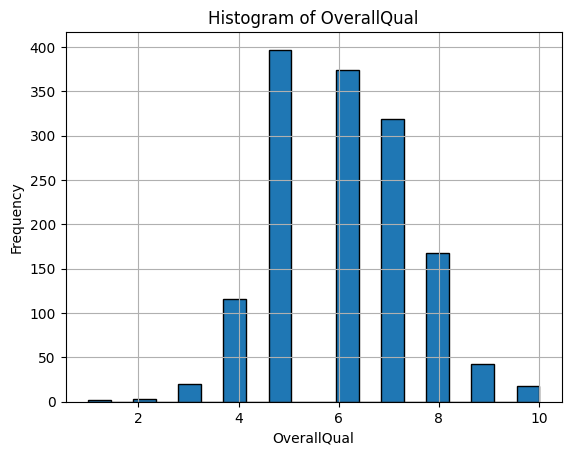

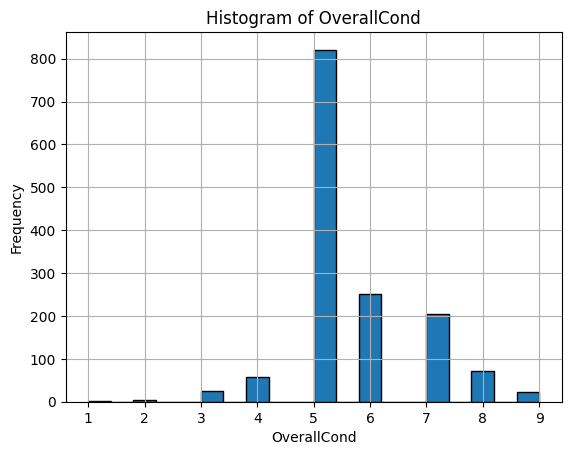

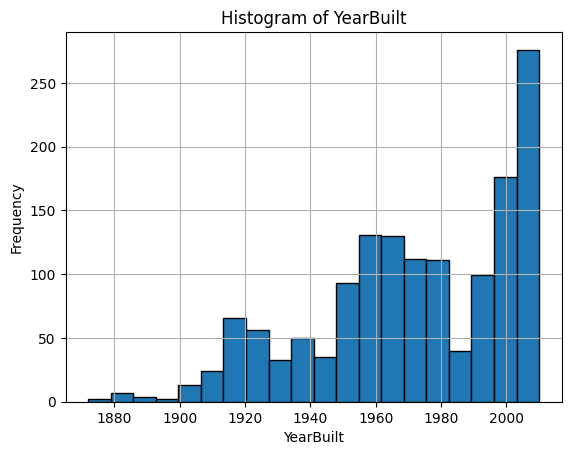

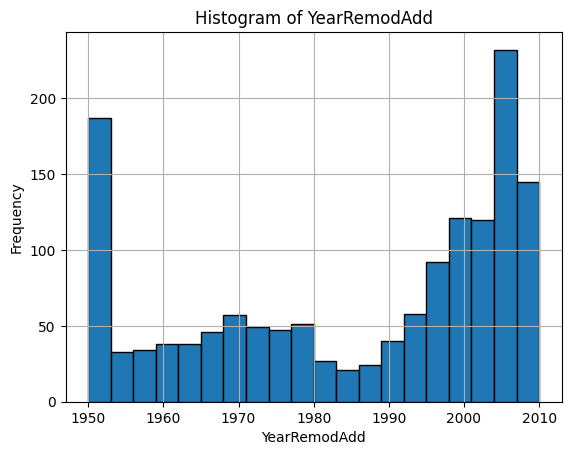

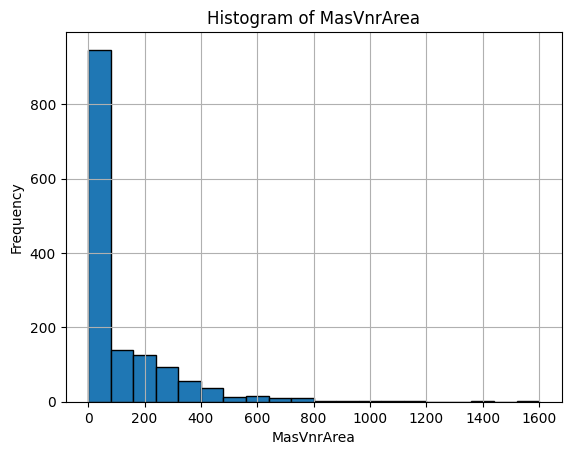

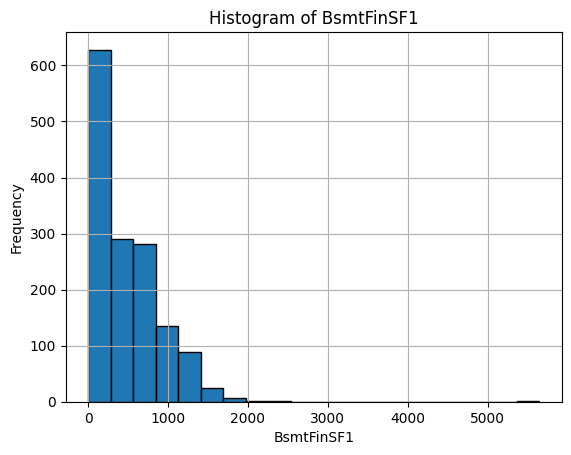

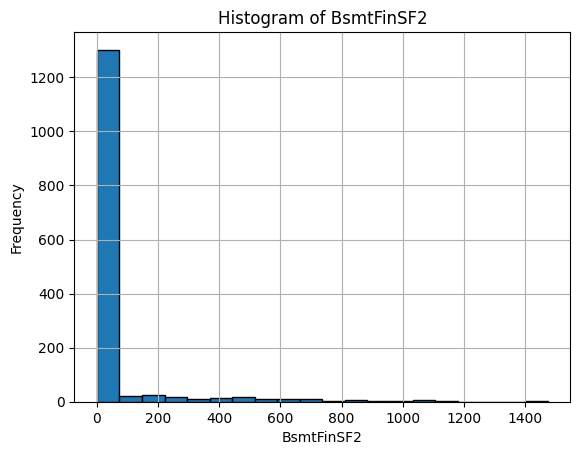

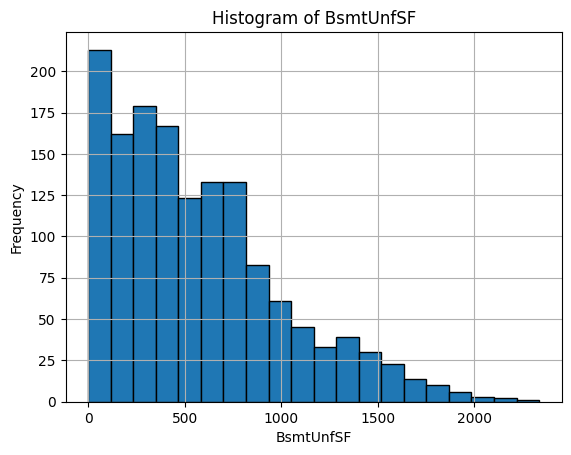

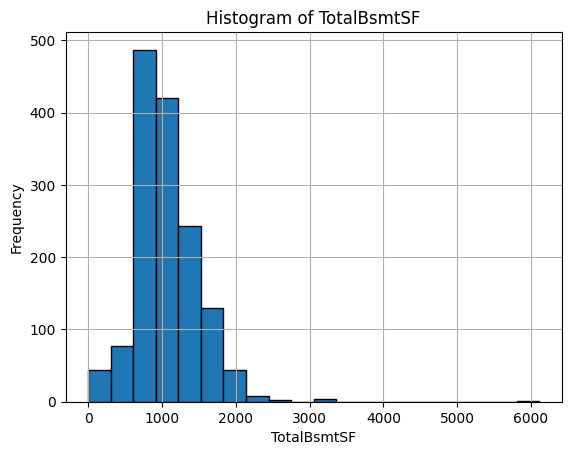

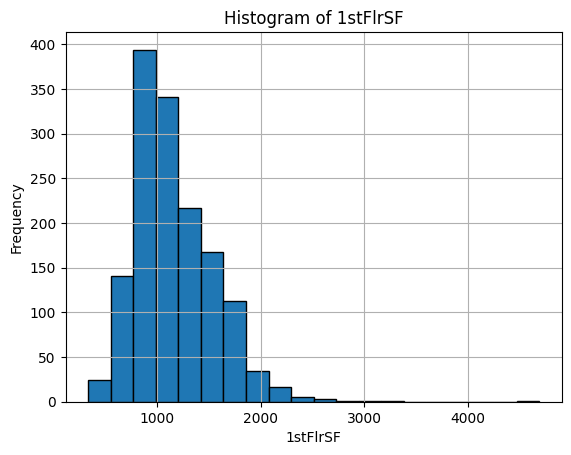

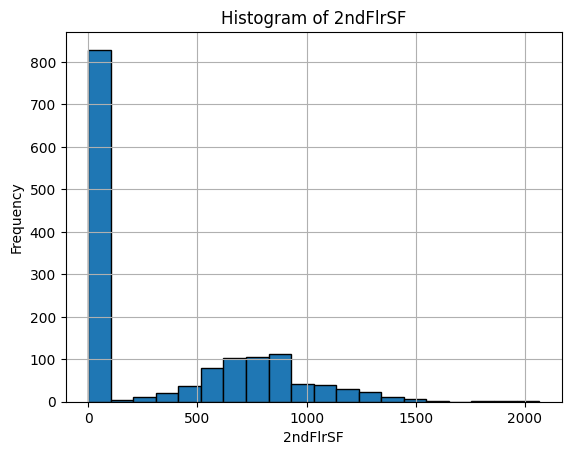

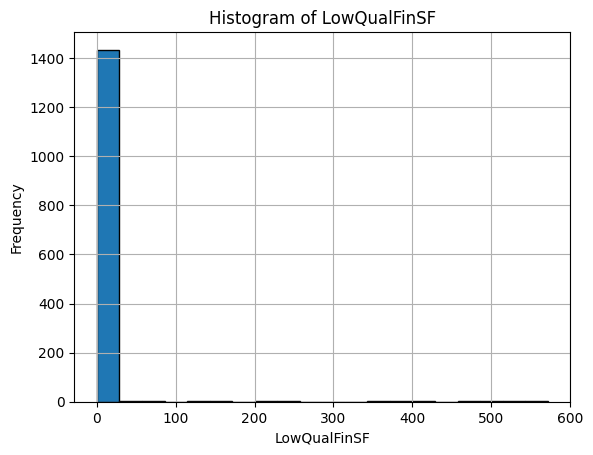

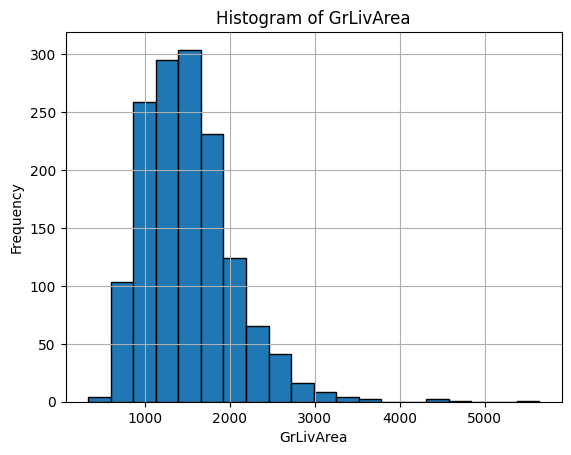

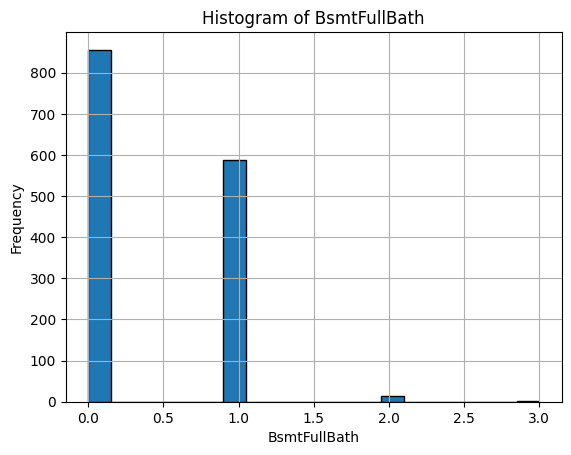

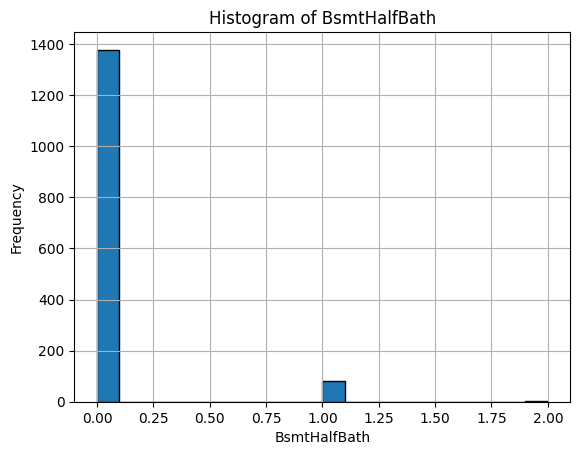

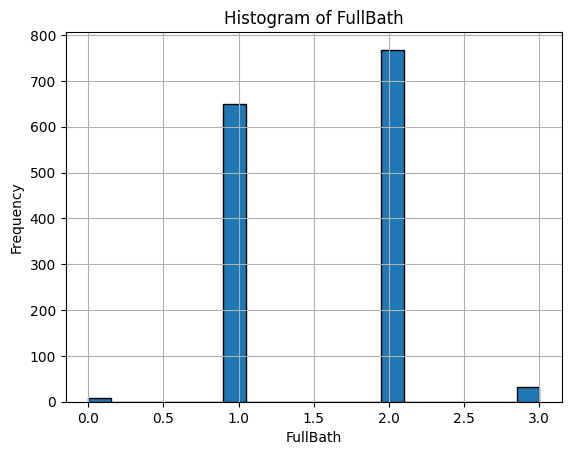

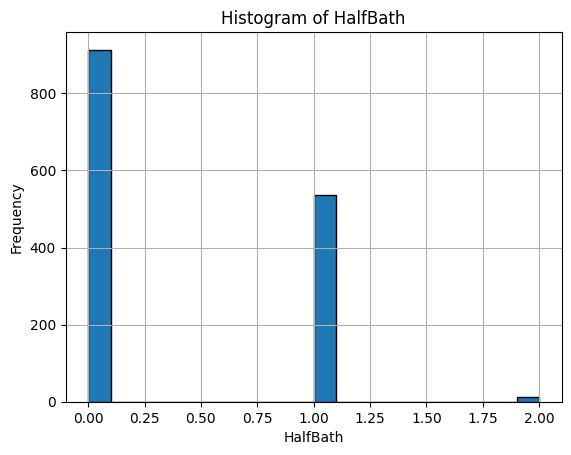

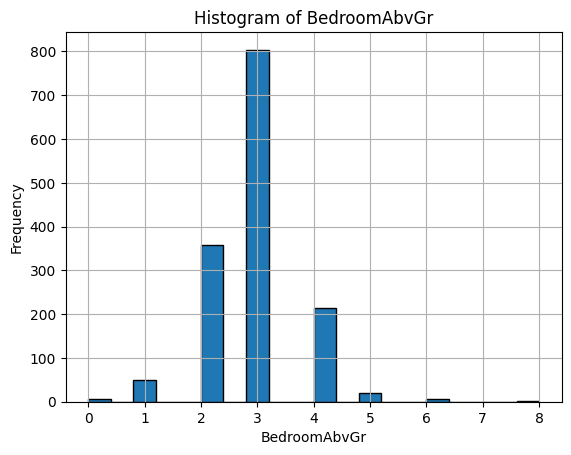

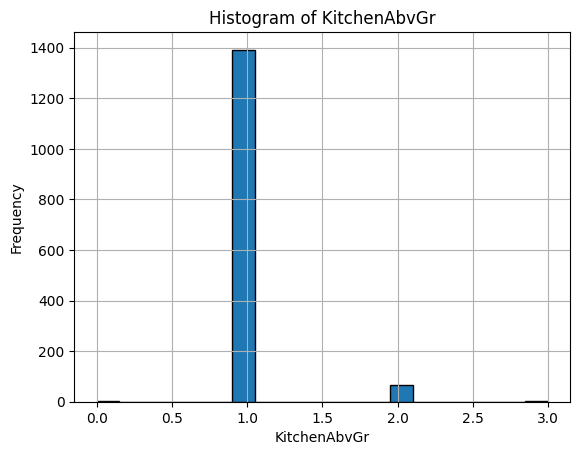

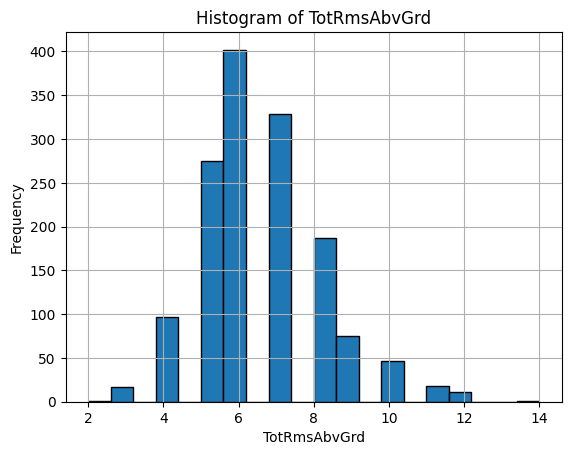

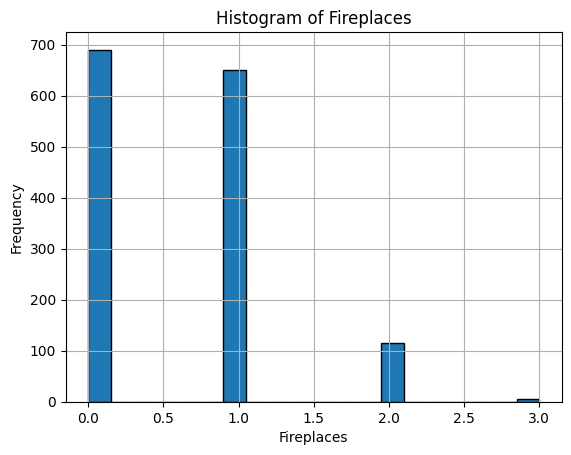

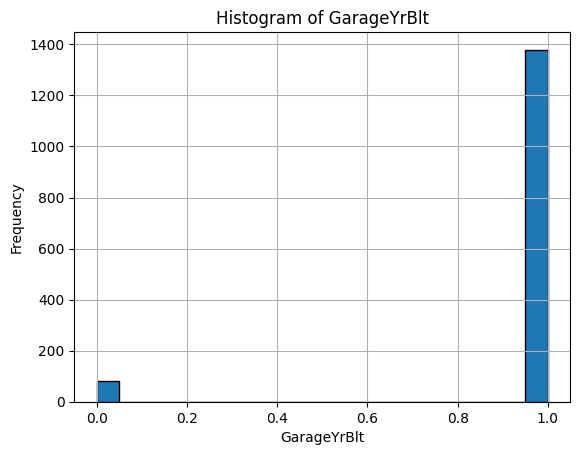

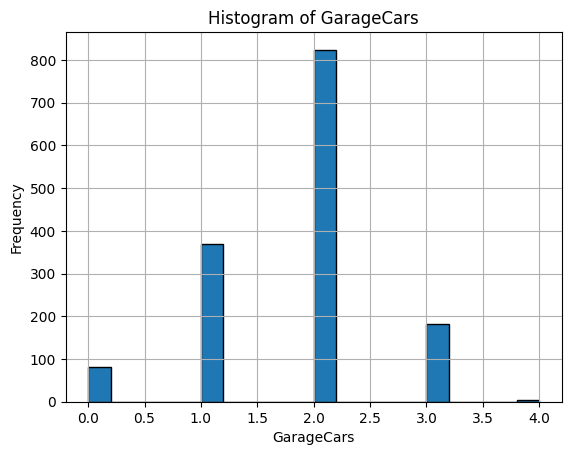

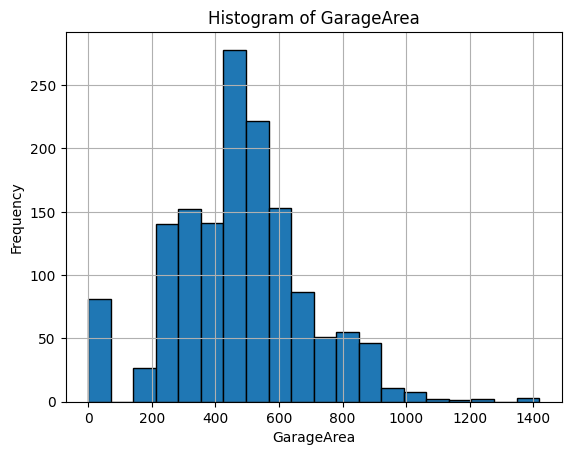

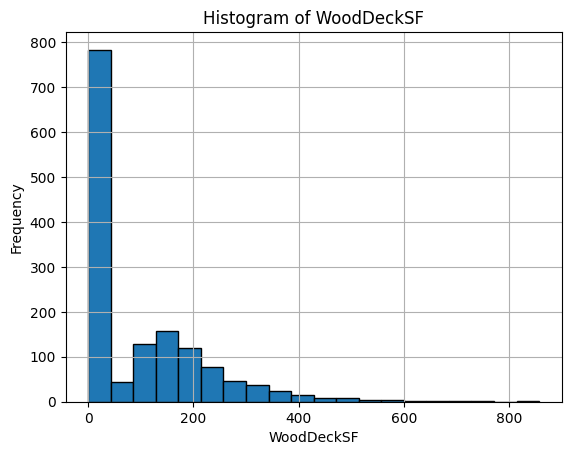

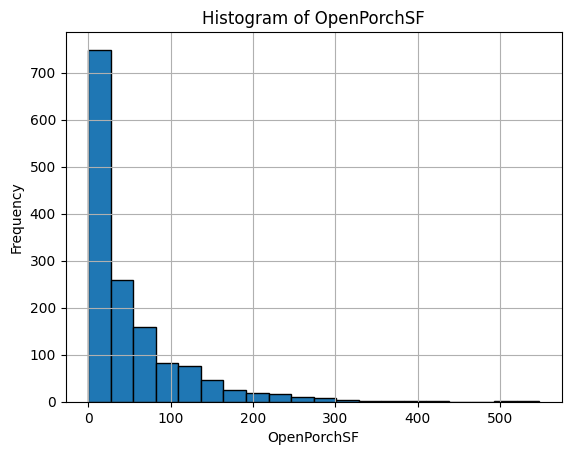

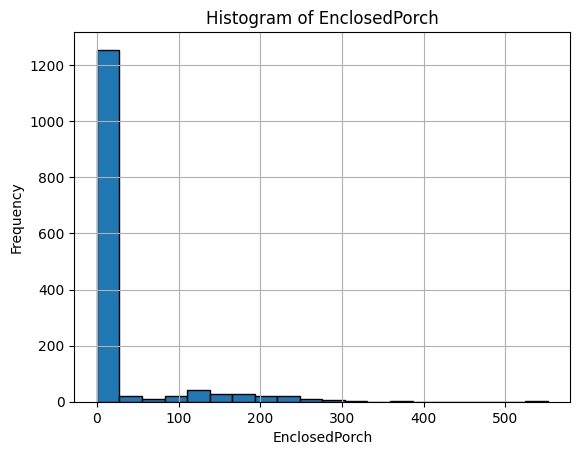

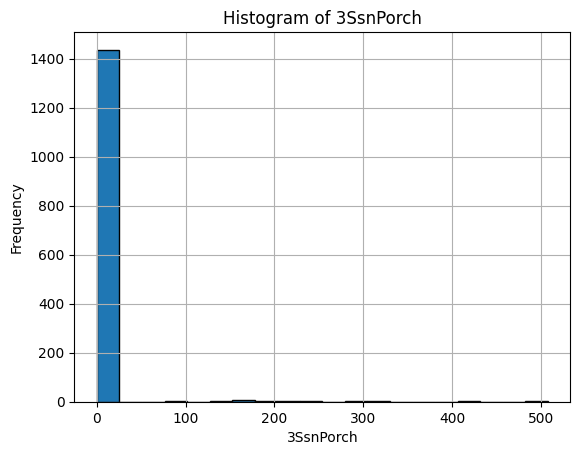

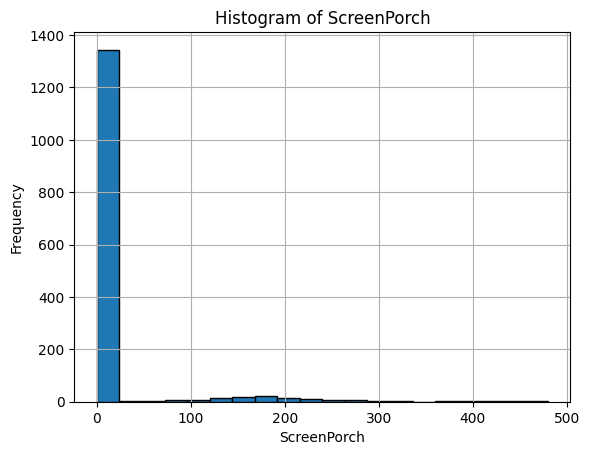

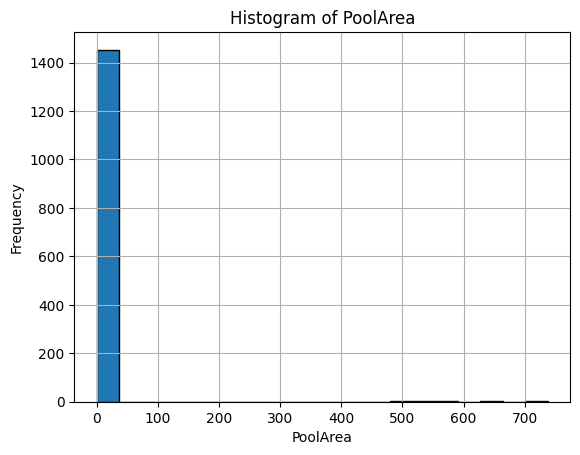

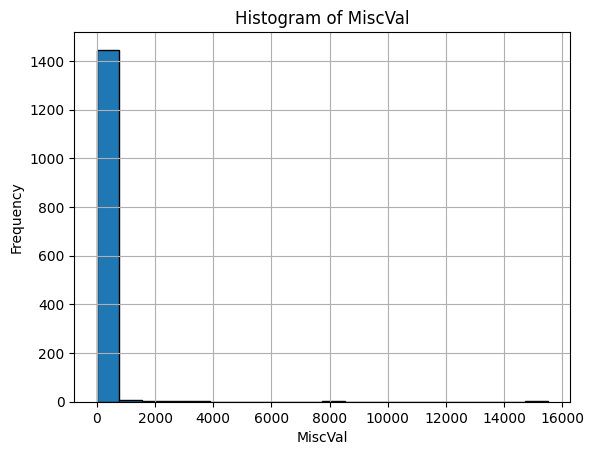

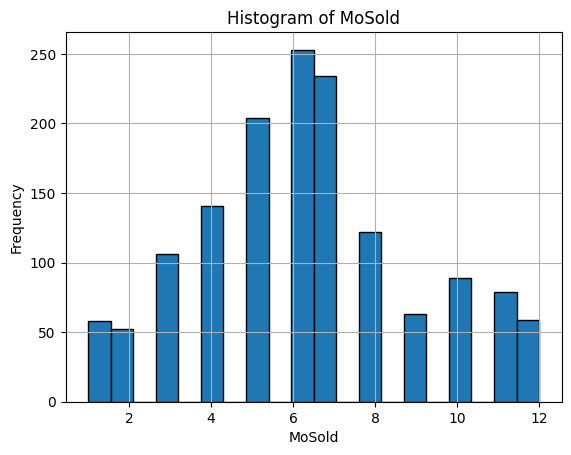

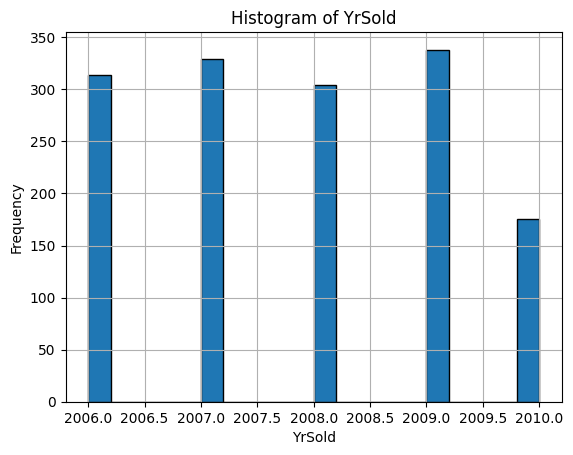

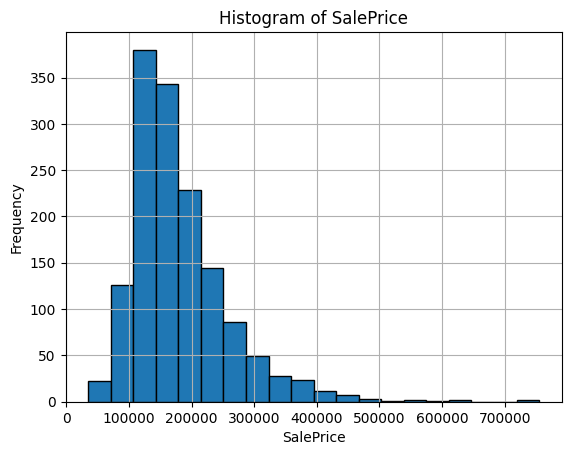

In [308]:
numeric_columns = df_train.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for numeric columns
for column in numeric_columns:
    plot_histogram(df_train, column)

After a first look we can see that some hist show us that there are values that are almost contants or that has just two or three values which are very imbalanced, so we will drop the following columns

In [309]:
numerical_columns_to_drop = [
    'LowQualFinSF',
    'BsmtHalfBath',
    'KitchenAbvGr',
    'EnclosedPorch',
    '3SsnPorch',
    'ScreenPorch',
    'MiscVal'
]

erased_columns = erased_columns + numerical_columns_to_drop

# Drop the specified columns
df_train = df_train.drop(columns=numerical_columns_to_drop)


In [310]:
erased_columns

['Street',
 'Utilities',
 'RoofMatl',
 'Heating',
 'Condition2',
 'Functional',
 'PoolQC',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal']